<a href="https://colab.research.google.com/github/senanayake/colab-notebooks/blob/main/SafeHavenLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Safe Haven Lab: From Bernoulli to Tail-Hedged Portfolios

This notebook is an interactive lab inspired by Mark Spitznagel's *Safe Haven*.

We will:

1. Start from absolute first principles of **compounding**.
2. Derive why **log-returns** and **geometric returns** matter.
3. Use **SymPy** to derive **volatility drag**.
4. Explore the **St. Petersburg wager** and why averages can mislead.
5. Simulate:
   - Arithmetic vs geometric returns
   - Sequence-of-returns risk and "Bernoulli Falls"
   - Toy Safe Haven vs all-equity portfolios
   - Kelly betting and overbetting

The goal: build a *numerical intuition* for why avoiding large drawdowns and respecting multiplicative wealth is the core of long-term investing.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sympy import symbols, log, series, Eq, simplify
from sympy import init_printing

init_printing()
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)
np.random.seed(42)


## 1. The Core Premise

> Wealth evolves **multiplicatively**, not additively.  
> Large drawdowns destroy long-term compounding.  
> A portfolio with slightly lower average return but much lower volatility can **grow faster**.

We will:
- Show how a simple two-asset toy example can have higher arithmetic average return but lower final wealth.
- Use this as the intuitive foundation for everything that follows.


Portfolio A: arithmetic avg = 15.00%, geometric = 5.83%, final wealth = 176.23
Portfolio B: arithmetic avg = 10.00%, geometric = 10.00%, final wealth = 259.37


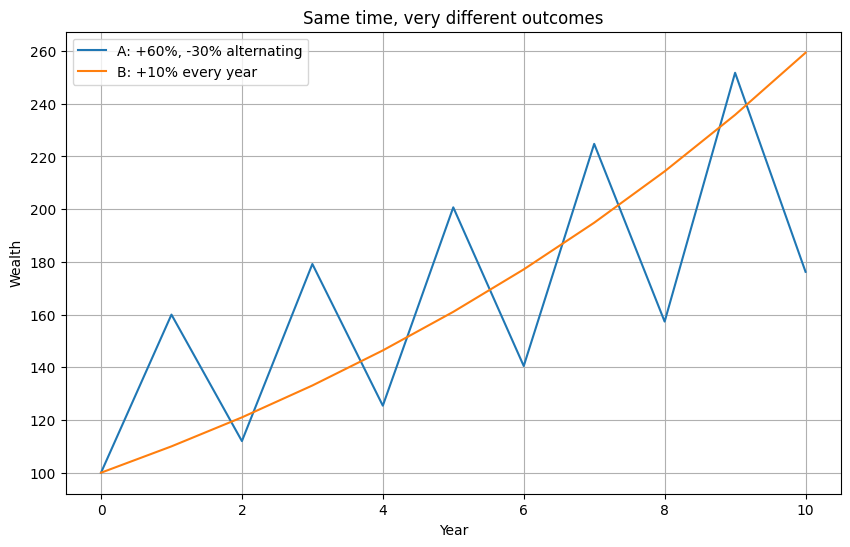

In [2]:
# Toy example: Portfolio A vs Portfolio B

years = np.arange(0, 11)

# Portfolio A: +60%, -30%, repeat
returns_A = np.array([0.60, -0.30] * 5)  # 10 years
wealth_A = [100]
for r in returns_A:
    wealth_A.append(wealth_A[-1] * (1 + r))
wealth_A = np.array(wealth_A)

# Portfolio B: +10% every year
returns_B = np.array([0.10] * 10)
wealth_B = [100]
for r in returns_B:
    wealth_B.append(wealth_B[-1] * (1 + r))
wealth_B = np.array(wealth_B)

arith_A = returns_A.mean()
arith_B = returns_B.mean()
geo_A = (wealth_A[-1] / wealth_A[0])**(1/10) - 1
geo_B = (wealth_B[-1] / wealth_B[0])**(1/10) - 1

print(f"Portfolio A: arithmetic avg = {arith_A:.2%}, geometric = {geo_A:.2%}, final wealth = {wealth_A[-1]:.2f}")
print(f"Portfolio B: arithmetic avg = {arith_B:.2%}, geometric = {geo_B:.2%}, final wealth = {wealth_B[-1]:.2f}")

plt.plot(years, wealth_A, label="A: +60%, -30% alternating")
plt.plot(years, wealth_B, label="B: +10% every year")
plt.title("Same time, very different outcomes")
plt.xlabel("Year")
plt.ylabel("Wealth")
plt.legend()
plt.grid(True)
plt.show()


## 2. Multiplicative Wealth & Bernoulli’s Insight

### 2.1 Wealth is a product of growth factors

If returns each period are \( r_1, r_2, \dots, r_n \), then wealth after \( n \) periods is:

\[
W_n = W_0 \prod_{t=1}^n (1 + r_t)
\]

Take logs:

\[
\ln W_n = \ln W_0 + \sum_{t=1}^n \ln(1 + r_t)
\]

Define the **average log-return**:

\[
\bar{g}_n = \frac{1}{n} \sum_{t=1}^n \ln(1 + r_t)
\]

Then:

\[
\ln W_n = \ln W_0 + n \bar{g}_n
\quad\Rightarrow\quad
W_n = W_0 \, e^{n \bar{g}_n}
\]

As \( n \to \infty \), by the Law of Large Numbers:

\[
\bar{g}_n \to \mathbb{E}[\ln(1 + r)]
\]

**Key result:**

> The long-run compound growth rate is determined by  
> \[
> g = \mathbb{E}[\ln(1 + r)].
> \]

This is why **log-returns** and **geometric returns** are the natural objects for compounding.
